In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1 & 2: Load the dataset AND rescale images
# Step 3: Apply data augmentation only to training data

test_dir = r"C:\Users\asus\Desktop\fish dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\test"
train_dir   = r"C:\Users\asus\Desktop\fish dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train"
val_dir  = r"C:\Users\asus\Desktop\fish dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val"

img_size = (224, 224)
batch_size = 32

# Training generator with rescale + augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1
)

# Validation and test generators: only rescale
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

# ✅ Use the correct paths here!
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # RGB images, 224x224
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),

    keras.layers.Dense(11, activation='softmax')  # 11 fish classes instead of 10
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_data,
    validation_data=val_data,  # separate validation dataset
    epochs=15
)



loss, accuracy = model.evaluate(test_data)
print(f"Test accuracy: {accuracy:.2f}")


c:\Users\asus\Desktop\fish dataset\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\asus\Desktop\fish dataset\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.4014 - loss: 1.9123 - val_accuracy: 0.5659 - val_loss: 1.2144
Epoch 2/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.5717 - loss: 1.2239 - val_accuracy: 0.6575 - val_loss: 0.9524
Epoch 3/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.6803 - loss: 0.9078 - val_accuracy: 0.7793 - val_loss: 0.6681
Epoch 4/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.7470 - loss: 0.7081 - val_accuracy: 0.8434 - val_loss: 0.4739
Epoch 5/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.8114 - loss: 0.5498 - val_accuracy: 0.8874 - val_loss: 0.3838
Epoch 6/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.8487 - loss: 0.4344 - val_accuracy: 0.9103 - val_loss: 0.3232
Epoch 7/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.8684 - loss: 0.3775 - val_accuracy: 0.9295 - val_loss: 0.2369
Epoch 8/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.8925 - loss: 0.3133 - val_accu

In [7]:
model.save('cnn_scratch_fish.h5')


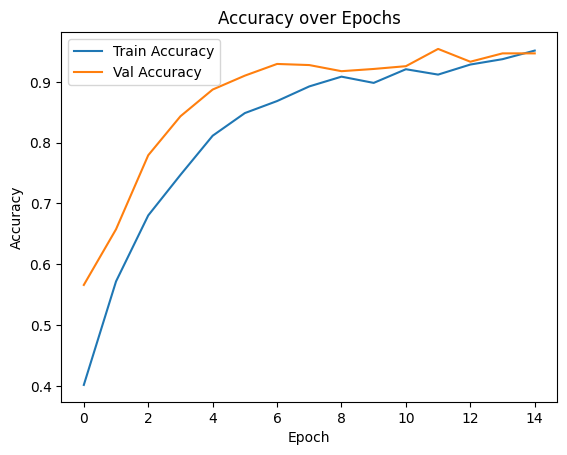

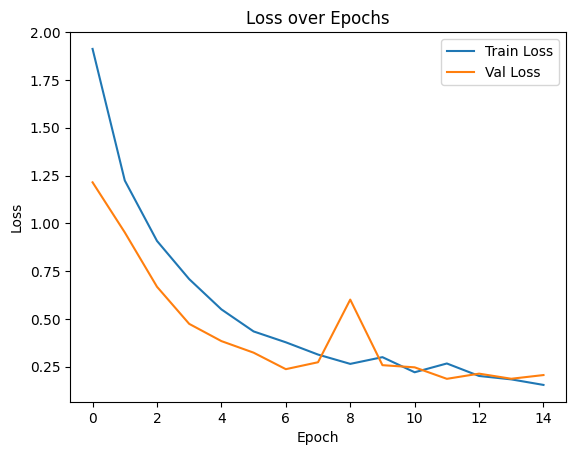

In [9]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input


In [11]:
# Load VGG16 without top classifier layers
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze the base model layers (optional - you can fine-tune later)
base_model.trainable = False


In [12]:
# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(11, activation='softmax')(x)  # 11 classes

# Define full model
model = Model(inputs=base_model.input, outputs=output)


In [13]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [15]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # You can adjust
)




Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 828s 4s/step - accuracy: 0.8573 - loss: 0.4873 - val_accuracy: 0.9478 - val_loss: 0.2286
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 592s 3s/step - accuracy: 0.8885 - loss: 0.3825 - val_accuracy: 0.9689 - val_loss: 0.1673
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 611s 3s/step - accuracy: 0.9104 - loss: 0.3087 - val_accuracy: 0.9689 - val_loss: 0.1302
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 604s 3s/step - accuracy: 0.9187 - loss: 0.2706 - val_accuracy: 0.9707 - val_loss: 0.1178
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 592s 3s/step - accuracy: 0.9327 - loss: 0.2243 - val_accuracy: 0.9744 - val_loss: 0.0910
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 597s 3s/step - accuracy: 0.9396 - loss: 0.2097 - val_accuracy: 0.9789 - val_loss: 0.0859
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 597s 3s/step - accuracy: 0.9428 - loss: 0.1887 - val_accuracy: 0.9734 - val_loss: 0.0894
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1111s 6s/step - accuracy: 0.9507 - loss: 0.1671 - val_acc

In [16]:
model.save('vgg16_fish.h5')


In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input



In [3]:
# Load MobileNetV2 without the top layers
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_tensor=Input(shape=(224, 224, 3))
)

C:\Users\asus\AppData\Local\Temp\ipykernel_24944\459831808.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


In [4]:
# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # preferred over Flatten for MobileNet
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(11, activation='softmax')(x)  # 11 fish categories
model = Model(inputs=base_model.input, outputs=output)

In [6]:

# Compile
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    train_data,
    validation_data=val_data,  # if you have it
    epochs=5
)
# Save
model.save('mobilenetv2_fish.h5')

c:\Users\asus\Desktop\fish dataset\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1569s 8s/step - accuracy: 0.8490 - loss: 0.5097 - val_accuracy: 0.7756 - val_loss: 0.6827
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1267s 6s/step - accuracy: 0.9865 - loss: 0.0491 - val_accuracy: 0.8333 - val_loss: 0.5915
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1574s 8s/step - accuracy: 0.9924 - loss: 0.0286 - val_accuracy: 0.8910 - val_loss: 0.3168
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1341s 7s/step - accuracy: 0.9937 - loss: 0.0210 - val_accuracy: 0.9744 - val_loss: 0.0878
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1386s 7s/step - accuracy: 0.9955 - loss: 0.0132 - val_accuracy: 0.9707 - val_loss: 0.0875


In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

In [3]:
# Load ResNet50 without top layers
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_tensor=Input(shape=(224, 224, 3))
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 85s 1us/step


In [4]:
# Freeze base layers
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # works better than Flatten for ResNet
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(11, activation='softmax')(x)  # 11 fish categories

# Build full model
model = Model(inputs=base_model.input, outputs=output)


In [5]:
# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    train_data,
    validation_data=val_data,  # optional if you have it
    epochs=10
)

# Save trained model
model.save('resnet50_fish.h5')

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 560s 3s/step - accuracy: 0.1377 - loss: 2.4281 - val_accuracy: 0.1712 - val_loss: 2.2668
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 516s 3s/step - accuracy: 0.1754 - loss: 2.2839 - val_accuracy: 0.1712 - val_loss: 2.2325
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 523s 3s/step - accuracy: 0.1897 - loss: 2.2390 - val_accuracy: 0.1676 - val_loss: 2.2094
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 516s 3s/step - accuracy: 0.1928 - loss: 2.2213 - val_accuracy: 0.1978 - val_loss: 2.1769
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 515s 3s/step - accuracy: 0.2085 - loss: 2.1914 - val_accuracy: 0.2262 - val_loss: 2.1518
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 541s 3s/step - accuracy: 0.2180 - loss: 2.1691 - val_accuracy: 0.1987 - val_loss: 2.1280
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 575s 3s/step - accuracy: 0.2218 - loss: 2.1423 - val_accuracy: 0.2509 - val_loss: 2.0997
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 556s 3s/step - accuracy: 0.2183 - loss: 2.1335 - val_accu

In [8]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input


In [9]:
# Load ResNet50 without top layers
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_tensor=Input(shape=(224, 224, 3))
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 67s 1us/step


In [10]:
# Freeze base layers
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # works better than Flatten for ResNet
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(11, activation='softmax')(x)  # 11 fish categories

# Build full model
model = Model(inputs=base_model.input, outputs=output)

In [11]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# Train model
history = model.fit(
    train_data,
    validation_data=val_data,  # optional if you have it
    epochs=15
)

# Save trained model
model.save('inceptionv3_fish.h5')

Epoch 1/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.5595 - loss: 1.3676 - val_accuracy: 0.8828 - val_loss: 0.5216
Epoch 2/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.8151 - loss: 0.5977 - val_accuracy: 0.9240 - val_loss: 0.3220
Epoch 3/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.8702 - loss: 0.4189 - val_accuracy: 0.9350 - val_loss: 0.2398
Epoch 4/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.8988 - loss: 0.3296 - val_accuracy: 0.9542 - val_loss: 0.1850
Epoch 5/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.9060 - loss: 0.2969 - val_accuracy: 0.9560 - val_loss: 0.1537
Epoch 6/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.9227 - loss: 0.2446 - val_accuracy: 0.9597 - val_loss: 0.1351
Epoch 7/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.9290 - loss: 0.2300 - val_accuracy: 0.9661 - val_loss: 0.1245
Epoch 8/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.9337 - loss: 0.2031 - val_accu

In [16]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input


In [17]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_tensor=Input(shape=(224, 224, 3))
)

In [23]:
# Freeze base layers
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # works well for Xception
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(11, activation='softmax')(x)  # 11 fish categories

In [24]:
model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
# Train model
history = model.fit(
    train_data,
    validation_data=val_data,  # optional if you have it
    epochs=15
)

# Save trained model
model.save('xception_fish.h5')

c:\Users\asus\Desktop\fish dataset\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 612s 3s/step - accuracy: 0.6239 - loss: 1.2644 - val_accuracy: 0.8764 - val_loss: 0.5626
Epoch 2/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 605s 3s/step - accuracy: 0.8469 - loss: 0.5573 - val_accuracy: 0.9194 - val_loss: 0.3483
Epoch 3/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 598s 3s/step - accuracy: 0.8890 - loss: 0.3926 - val_accuracy: 0.9396 - val_loss: 0.2600
Epoch 4/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 546s 3s/step - accuracy: 0.9104 - loss: 0.3060 - val_accuracy: 0.9487 - val_loss: 0.2071
Epoch 5/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 549s 3s/step - accuracy: 0.9284 - loss: 0.2596 - val_accuracy: 0.9505 - val_loss: 0.1798
Epoch 6/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 547s 3s/step - accuracy: 0.9391 - loss: 0.2220 - val_accuracy: 0.9597 - val_loss: 0.1539
Epoch 7/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 542s 3s/step - accuracy: 0.9390 - loss: 0.2007 - val_accuracy: 0.9579 - val_loss: 0.1432
Epoch 8/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 560s 3s/step - accuracy: 0.9505 - loss: 0.1836 - val_accu

c:\Users\asus\Desktop\fish dataset\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 491s 4s/step
VGG16 Classification Report
                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       520
                animal fish bass       1.00      0.08      0.14        13
   fish sea_food black_sea_sprat       0.99      1.00      0.99       298
   fish sea_food gilt_head_bream       0.99      1.00      1.00       305
   fish sea_food hourse_mackerel       1.00      0.99      0.99       286
        fish sea_food red_mullet       0.98      0.97      0.98       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      0.98      0.99       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.95      0.99      0.97       293
             fish sea_food trout       1.00      0.99      1.00       292

                        accuracy        

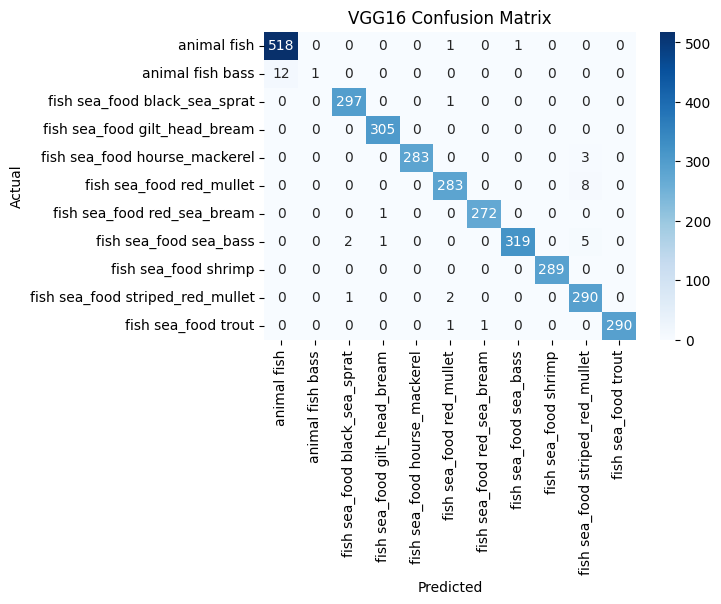

In [29]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the trained VGG16 model
vgg16_model = load_model('vgg16_fish.h5')

# Predictions
y_pred = vgg16_model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Classification Report
print("VGG16 Classification Report")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("VGG16 Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


100/100 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step
MobileNetV2 Classification Report
                                  precision    recall  f1-score   support

                     animal fish       0.99      0.98      0.99       520
                animal fish bass       1.00      0.77      0.87        13
   fish sea_food black_sea_sprat       1.00      0.96      0.98       298
   fish sea_food gilt_head_bream       1.00      0.99      1.00       305
   fish sea_food hourse_mackerel       1.00      0.90      0.95       286
        fish sea_food red_mullet       1.00      0.98      0.99       291
     fish sea_food red_sea_bream       0.98      1.00      0.99       273
          fish sea_food sea_bass       0.92      1.00      0.96       327
            fish sea_food shrimp       1.00      0.94      0.97       289
fish sea_food striped_red_mullet       0.87      0.99      0.93       293
             fish sea_food trout       0.99      1.00      0.99       292

                        accuracy  

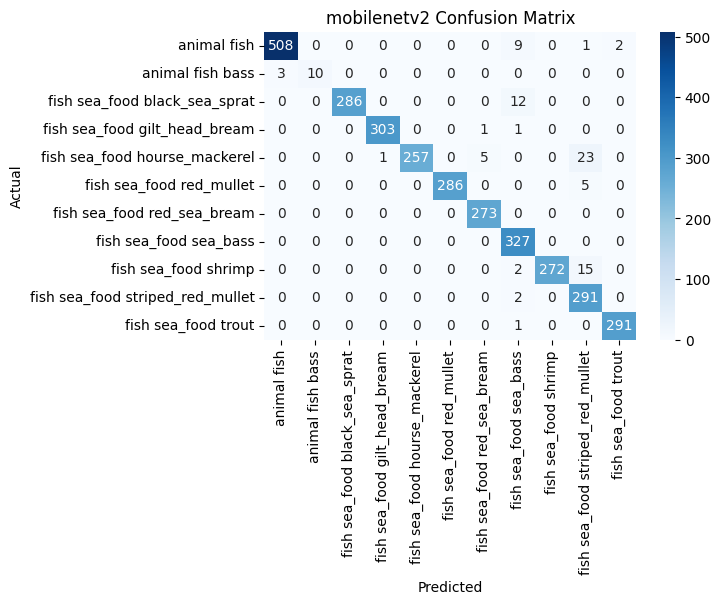

In [30]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the trained mobilenetv2 model
mobilenetV2_model = load_model('mobilenetv2_fish.h5')

# Predictions
y_pred = mobilenetV2_model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Classification Report
print("MobileNetV2 Classification Report")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("mobilenetv2 Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ResNet50 Classification Report


c:\Users\asus\Desktop\fish dataset\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\asus\Desktop\fish dataset\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\asus\Desktop\fish dataset\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

                                  precision    recall  f1-score   support

                     animal fish       0.23      0.75      0.36       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.35      0.07      0.11       286
        fish sea_food red_mullet       0.29      0.66      0.40       291
     fish sea_food red_sea_bream       0.67      0.01      0.03       273
          fish sea_food sea_bass       0.33      0.02      0.04       327
            fish sea_food shrimp       0.23      0.07      0.10       289
fish sea_food striped_red_mullet       0.32      0.21      0.25       293
             fish sea_food trout       0.20      0.34      0.25       292

                        accuracy                           0.25      3187
                       macro avg    

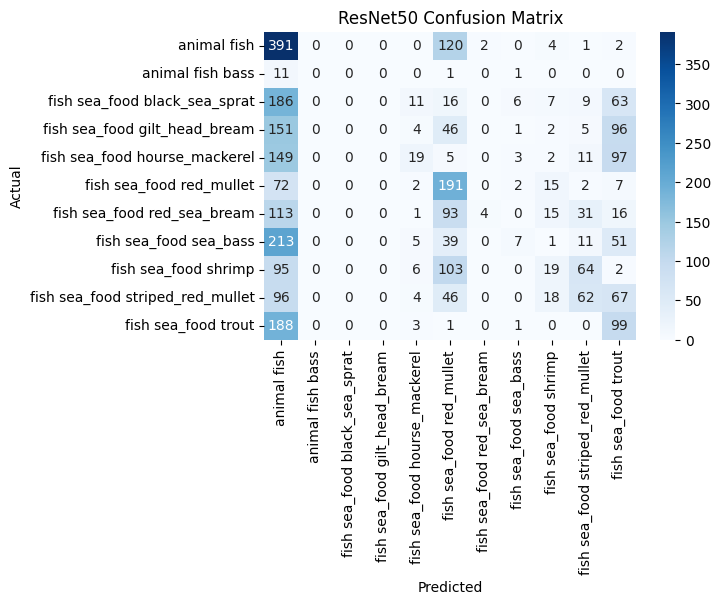

In [31]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load trained ResNet50 model
ResNet50_model = load_model('resnet50_fish.h5')

# Reset test data
test_data.reset()

# Predictions
y_pred = ResNet50_model.predict(test_data, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Classification Report
print("ResNet50 Classification Report")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("ResNet50 Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


InceptionV3 Classification Report
                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       520
                animal fish bass       1.00      0.15      0.27        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       0.99      0.98      0.98       305
   fish sea_food hourse_mackerel       0.99      1.00      0.99       286
        fish sea_food red_mullet       1.00      0.98      0.99       291
     fish sea_food red_sea_bream       0.99      0.99      0.99       273
          fish sea_food sea_bass       0.96      0.99      0.98       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.97      0.96      0.97       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                           0.99      3187
  

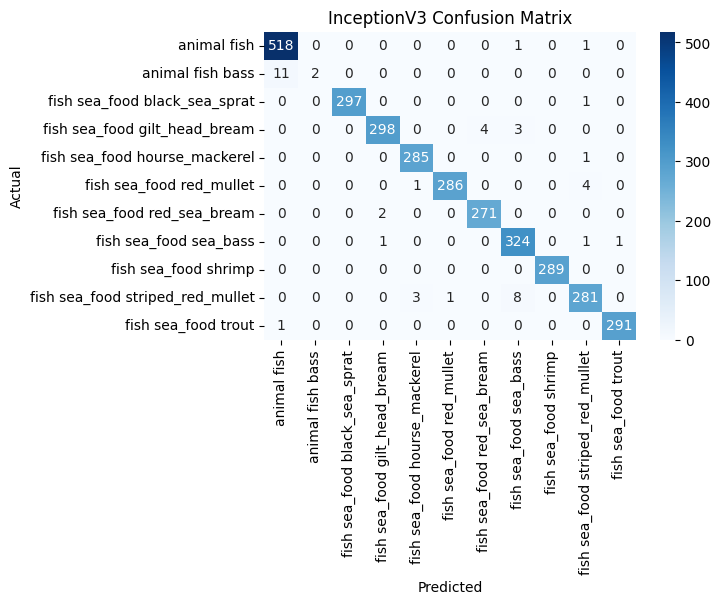

In [32]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load trained ResNet50 model
InceptionV3_model = load_model('inceptionv3_fish.h5')

# Reset test data
test_data.reset()

# Predictions
y_pred = InceptionV3_model.predict(test_data, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Classification Report
print("InceptionV3 Classification Report")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("InceptionV3 Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Xception Classification Report
                                  precision    recall  f1-score   support

                     animal fish       0.98      0.99      0.99       520
                animal fish bass       1.00      0.31      0.47        13
   fish sea_food black_sea_sprat       0.99      0.97      0.98       298
   fish sea_food gilt_head_bream       0.96      0.99      0.97       305
   fish sea_food hourse_mackerel       0.99      0.99      0.99       286
        fish sea_food red_mullet       0.98      0.99      0.99       291
     fish sea_food red_sea_bream       0.99      0.97      0.98       273
          fish sea_food sea_bass       0.98      0.99      0.98       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.98      0.98      0.98       293
             fish sea_food trout       1.00      0.98      0.99       292

                        accuracy                           0.98      3187
     

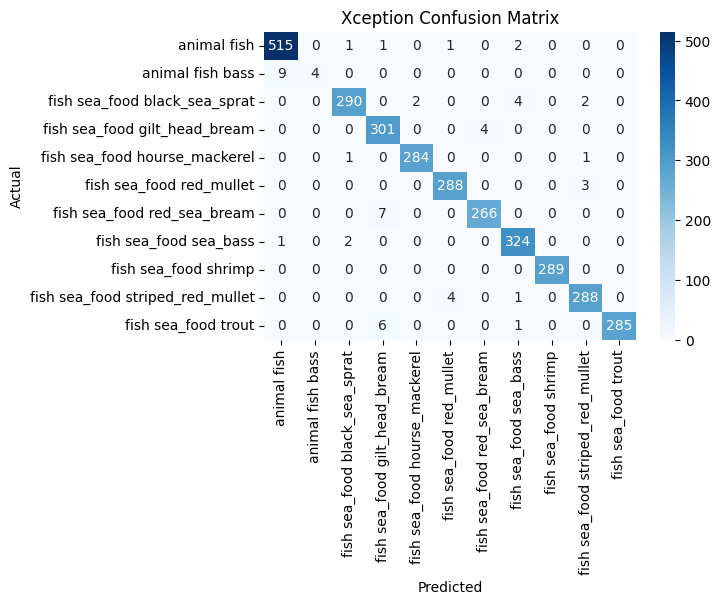

In [33]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load trained ResNet50 model
Xception_model = load_model('xception_fish.h5')

# Reset test data
test_data.reset()

# Predictions
y_pred = Xception_model .predict(test_data, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Classification Report
print("Xception Classification Report")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Xception Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [40]:
from tensorflow.keras.models import load_model
import numpy as np

# Example file names (replace with yours)
model_files = [
    'vgg16_fish.h5',
    'xception_fish.h5',
    'resnet50_fish.h5',
    'inceptionv3_fish.h5',
    'mobilenetv2_fish.h5'
]

models = [load_model(m) for m in model_files]


In [41]:
# Assuming you already have your test data generator
# Example: test_data = ImageDataGenerator(...).flow_from_directory(...)

results = {}
for name, model in zip(model_files, models):
    loss, acc = model.evaluate(test_data, verbose=0)
    results[name] = acc


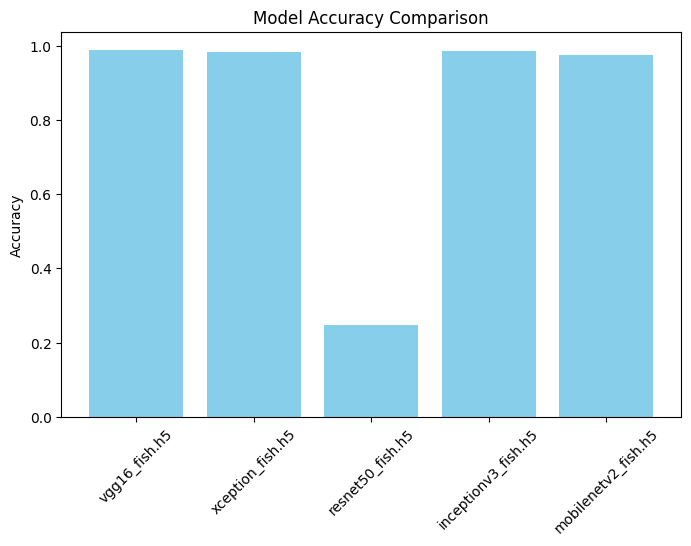

In [42]:
import matplotlib.pyplot as plt

names = list(results.keys())
acc_values = list(results.values())

plt.figure(figsize=(8,5))
plt.bar(names, acc_values, color='skyblue')
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()
